In [141]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Decomposing a signal into its components using fourier analysis

Say we have a diminishing signal, $f(t) = (sin(6\pi t) + sin(2\pi t))$ which is made up of two frequencies: 3 and 1, thus we expect to see a graph with peaks at x = 3 and x = 1.

Lets find the fourier transform of $f(t)$.

$$
\begin{align*}
\hat{f}(\omega) = \int^{\infty}_{-\infty}{(sin(6\pi t) + sin(2\pi t))e^{-\omega t i}}dt \\
\end{align*}
$$

This can be found numerically.

In [158]:
def wave(t):
    return (np.sin(6*np.pi*t)+np.sin(2*np.pi*t))

## Showing how the function looks mapped around a circle.

As we saw in the readme, we know that the integrand of the `fourier transform` is given by $g(t) = f(t)e^{-i\omega t} = f(t)(cos(\omega t) - isin(\omega t))$. In the `complex plane` this looks like a circle if $f(t)$ is constant, otherwise you can imagine plotting the value of $f(t)$ at the angle $\omega t$ radians around the origin for each value of $t$.

In [143]:
def circle_wrap_function(function,time,frequency):
    function_value = function(time)
    angle = time * frequency * 2 * np.pi
    return [function_value*np.cos(angle),-function_value*np.sin(angle)]

In [152]:
def circle_wrap_visualisation(function,frequency = 1):
    times = np.linspace(0,frequency, 10_000) # One whole revolution around the origin
    x_vals = []
    y_vals = []
    for time in times:
        x,y = circle_wrap_function(function,time,frequency)
        x_vals.append(x)
        y_vals.append(y)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_vals,y_vals,s=.1)
    ax.set_ylim(-2,2)
    ax.set_xlim(-2,2)
    ax.set_aspect('equal')

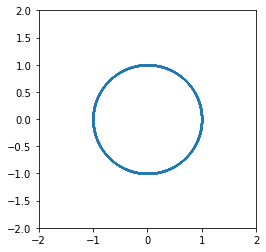

In [153]:
circle_wrap_visualisation(
    function = lambda t:1,
    frequency = 1) # Example of wrapping a constant function around the circle.

In [159]:
widgets.interact(lambda frequency:circle_wrap_visualisation(wave,frequency),frequency = (0.1,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='frequency', max=10.0, min=0.1), Output()), _dom_clas…

<function __main__.<lambda>(frequency)>